In [23]:
%matplotlib inline


In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
sns.set_style('white')
sns.set_context("poster")

threshold = 40
threshold_zsc = 3
win_hour = 120
win_day = win_hour * 24
win_week = win_day * 7
win_month = win_day * 30

In [25]:
df = pd.read_hdf('elite_sen_out.h5', 'table')
df.head()

,disp_251,disp_204
timestamp,,
2016-03-01 00:00:00,682.785770,267.0557
2016-03-01 00:00:30,679.969867,NaN
2016-03-01 00:01:00,682.313533,NaN
2016-03-01 00:01:30,683.238550,NaN
2016-03-01 00:02:00,681.594773,NaN


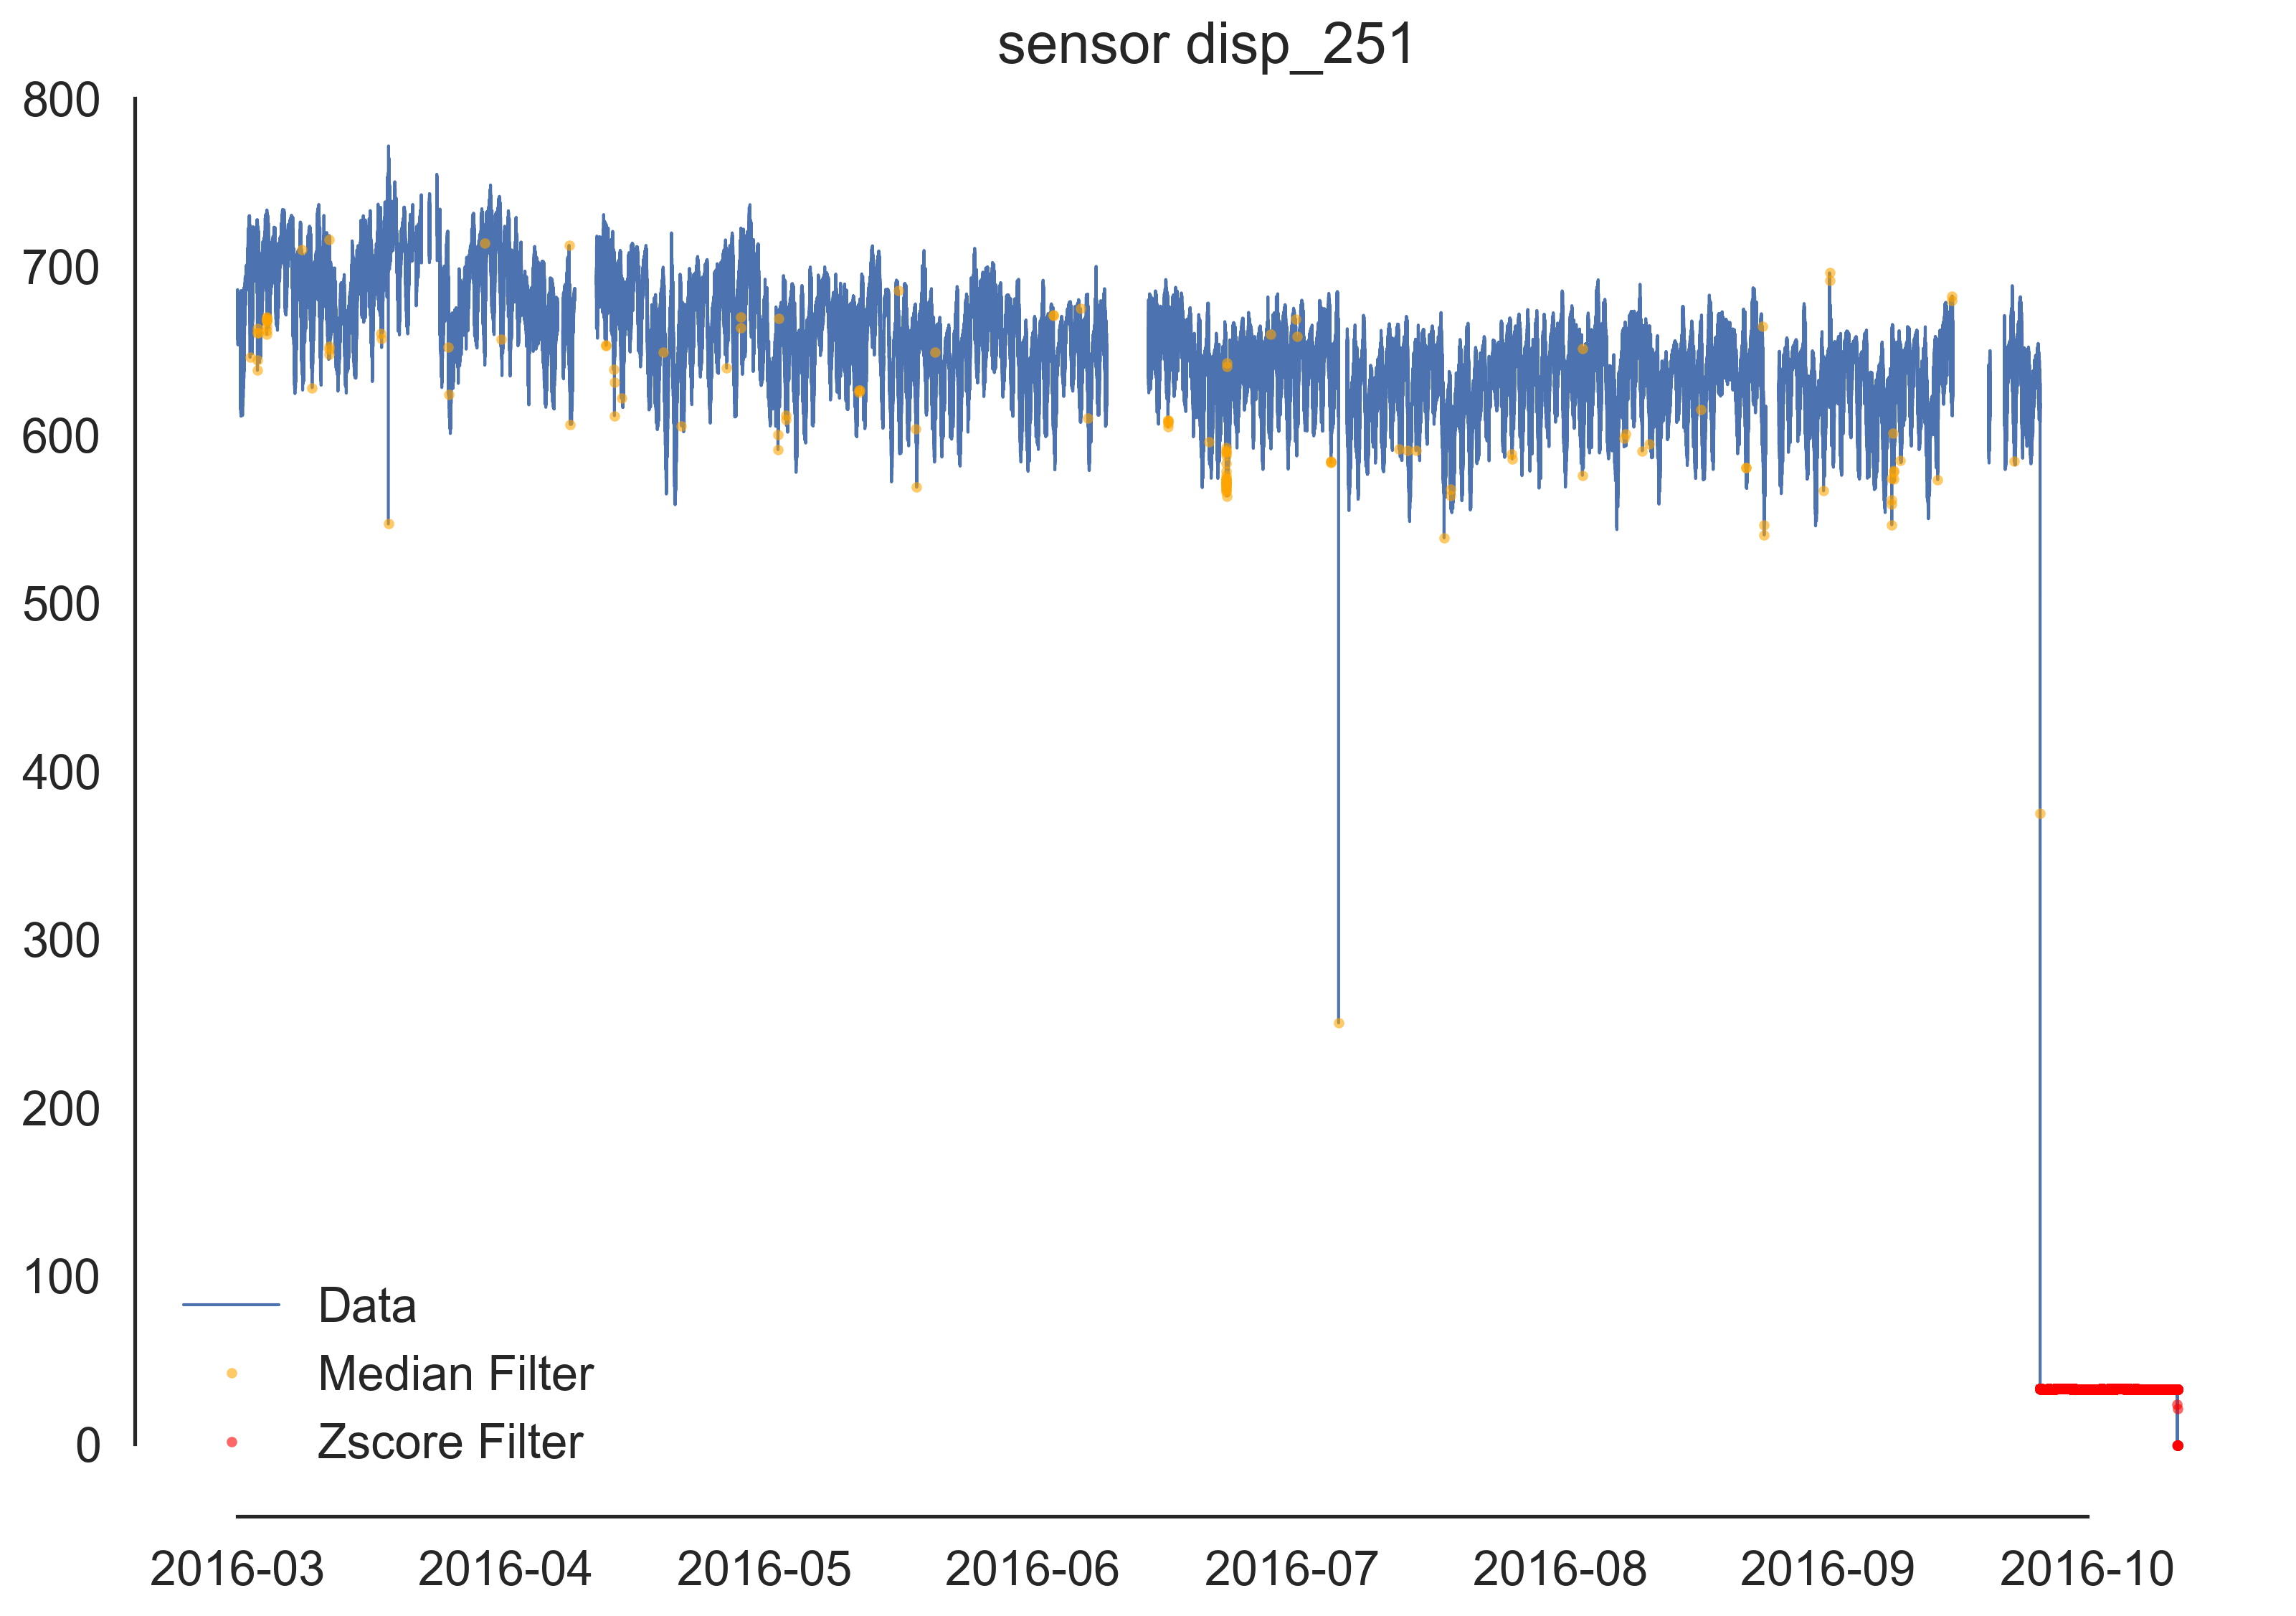

In [29]:
series = df.disp_251
col = 'disp_251'

d = pd.DataFrame(series)
plt.figure(dpi=300)
plt.plot(d[col], label='Data', linewidth=1)

# remove outliers by rolling method
d['median'] = d[col].rolling(window=win_hour).median()
d['median_diff'] = (d[col] - d['median']).abs()
plt.plot(d.loc[d['median_diff'] >= threshold, col], marker='.', linewidth=0, 
         c='orange', label='Median Filter', alpha=0.6, markersize=7)

d['zscore'] = (d[col] - d[col].mean()) / d[col].std()
d['zscore'] = d['zscore'].abs()
plt.plot(d.loc[d['zscore'] >= threshold_zsc, col], marker='.',
         linewidth=0, c='red', label='Zscore Filter', alpha=0.6, markersize=7)

plt.legend()
fig_title = 'sensor {}'.format(col)
plt.title(fig_title)
fig_name = fig_title.replace(" ", "_") + '_id.png'
sns.despine(offset=2, trim=True)
plt.savefig(fig_name)

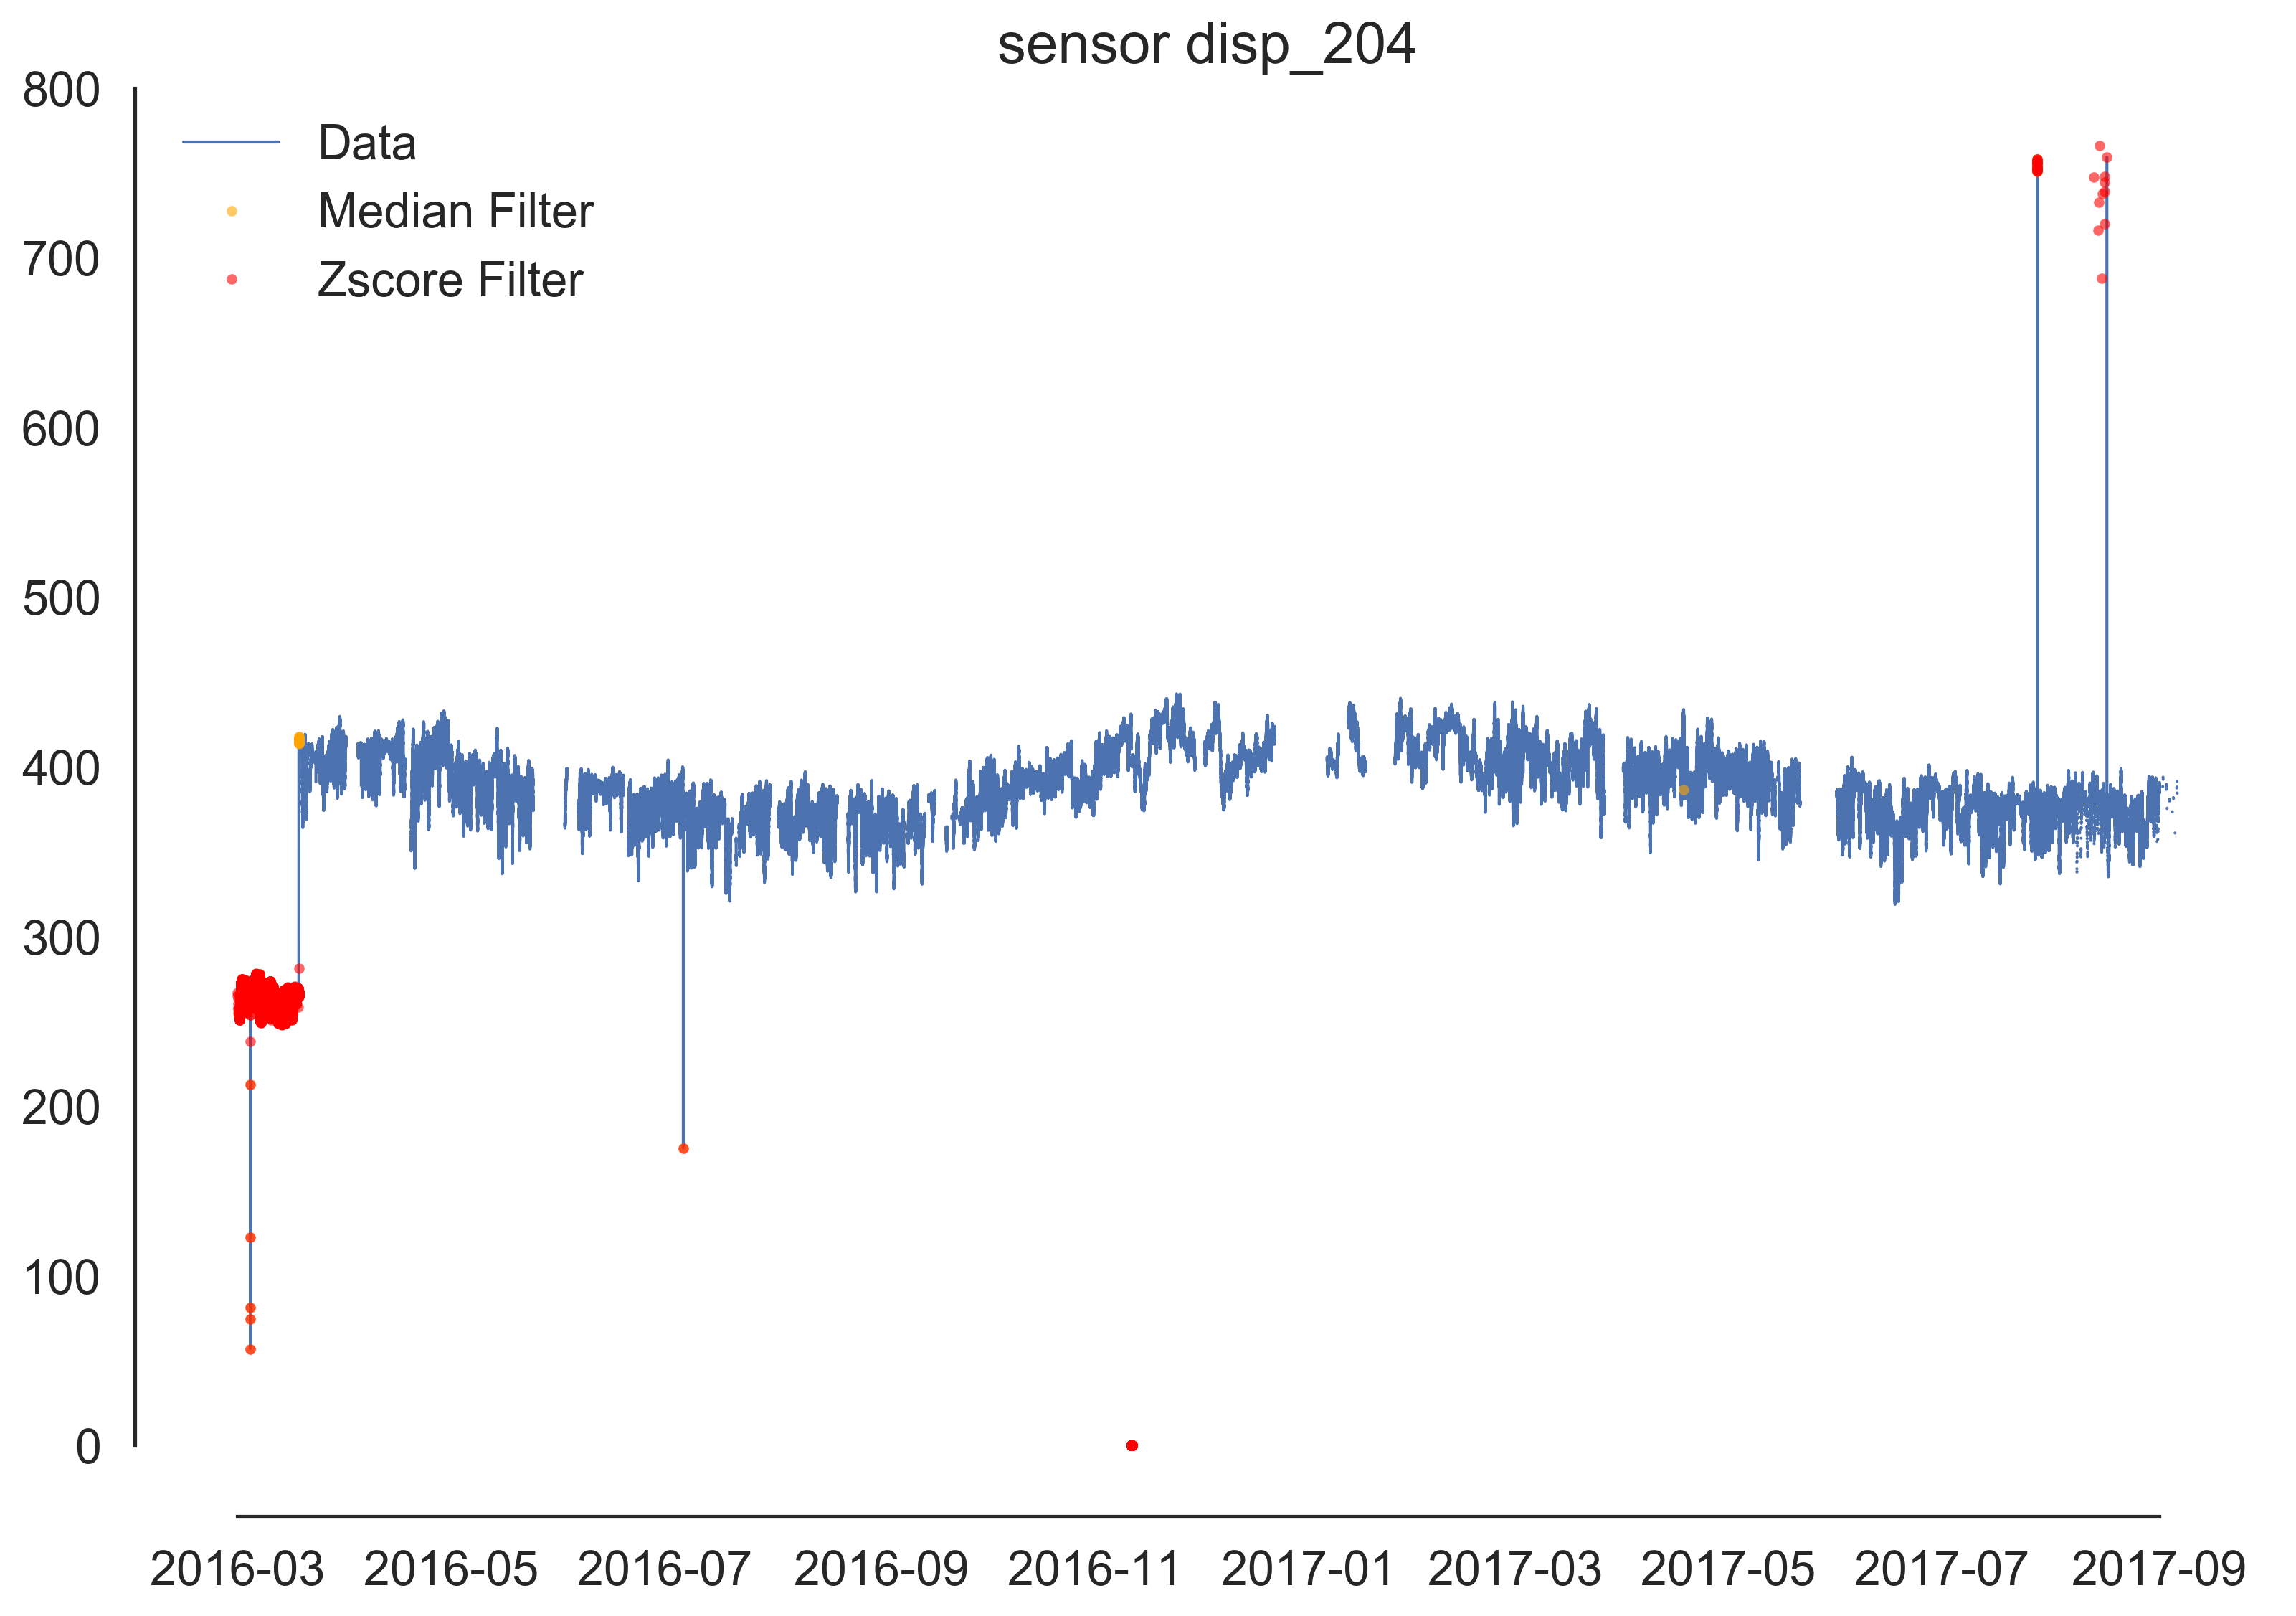

In [30]:
series = df.disp_204
col = 'disp_204'

d = pd.DataFrame(series)
plt.figure(dpi=300)
plt.plot(d[col], label='Data', linewidth=1)

# remove outliers by rolling method
d['median'] = d[col].rolling(window=win_hour).median()
d['median_diff'] = (d[col] - d['median']).abs()
plt.plot(d.loc[d['median_diff'] >= threshold, col], marker='.', linewidth=0, 
         c='orange', label='Median Filter', alpha=0.6, markersize=7)

d['zscore'] = (d[col] - d[col].mean()) / d[col].std()
d['zscore'] = d['zscore'].abs()
plt.plot(d.loc[d['zscore'] >= threshold_zsc, col], marker='.',
         linewidth=0, c='red', label='Zscore Filter', alpha=0.6, markersize=7)

plt.legend()
fig_title = 'sensor {}'.format(col)
plt.title(fig_title)
fig_name = fig_title.replace(" ", "_") + '_id.png'
sns.despine(offset=2, trim=True)
plt.savefig(fig_name)